<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Laboratorio_03_reg_lin_grad_descV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Estructura de un problema general de machine learning:
Los modelos de aprendizaje estadístico que pueden ser industriazados,   puede ser [esquematizado](https://proceedings.neurips.cc/paper/2015/file/86df7dcfd896fcaf2674f757a2463eba-Paper.pdf) según se muestra en la siguiente imagen:

![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOP_General.png?raw=true)


![MLOPs](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_MLOPS.png?raw=true)



A partir de ahora, nos concentraremos en entender los modelos de que ocurren dentro de la caja negra, y como encajan dentro de una estructura general de los modelos de machine learning ML.

De forma general un modelo de [ML](https://www.coursera.org/learn/machine-learning)   puede ser visualizado de la siguiente manera :

![SupervisedModel](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/Sesion_04_GeneralTraining.png?raw=true)



## ¿Cual es el mejor enfoque para optimizar un problema?

[Non-Free-Lunch-Theorem](https://ieeexplore.ieee.org/document/585893):
Por cada par de algoritmos hay tantos problemas en el que el primer algoritmo es mejor que el segundo como problemas en el que el segundo es mejor que el primero, como consecuencia no existe un unico algoritmo inteligente para optimizar un problema, siempre es recomendable emplear un cierto conocimiento especifico de un problema.



##  Estructura general de los problemas ML:
1. Construir hipotesis.
2. Elegir parametros
3. Elegir la funcion de coste.
4. Minimizar los datos
5. Validar y entrenar.



## Aprendizaje Supervisado :

- Datos etiquetados
- Retroalimentación directa
- Predicción de resultados.










# Regresión lineal:

Supongamos que tenemos un sistema en el que existe un predicor con  **m** valores de entrenamiento,  asi:   $ (x^{(1)}, y^{(1)} ) , (x^{(2)}, y^{(2)}) ... (x^{(m)}, y^{(m)})$


|Training|Y      | X_1  |
|--------|----------|----------|
|1|$Y^{1}$ | $X_1^{1}$|
|2|$Y^{2}$ | $X_1^{2}$|
|.|.         | .        |
|.|.         | .        |
|.|.         | .        |
|m|$Y^{m}$ | $X_1^{m}$  |



Podemos definir un modelo lineal  como : $h(X) = \theta_0 + \theta_1 X$ con $(\theta_0 , \theta_1)$ parámetros. Nuestro objetivo es encontrar el conjunto de puntos  $(\theta_0 , \theta_1)$ que se encuentan más "cercano" a $Y$ para cada $X$.

Para la optimización, vamos a definir la función de coste **$J(\theta_1,\theta_2 )$** para las muestras de entrenamiento como aquella que garantiza la distancia euclidiana respecto a la hipotesis planteada, así:

\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( h_{\theta} (x^{(i)})-y^{(i)})^2
\end{equation}

Para encontrar los valores  $(\theta_0 , \theta_1)$ se necesita  minimizar la función de coste, que permite obtener los valores más cercanos,  esta minimización podrá ser realizada a través de diferentes métodos el más conocido es el gradiente descendente.

![](https://github.com/hernansalinas/Curso_aprendizaje_estadistico/blob/main/Sesiones/imagenes/fig00.png?raw=true=50x)




Supongamos un modelo lineal para realizar la predicción, así nuestro modelo estará basado en la siguiente hipotesis de trabajo:

$h(X) =\theta_0 + \theta_1 X$


Reemplando el modelo anterior en la función de coste, tenemos que:



\begin{equation}
J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X)- y^{(i)})^2
\end{equation}



In [2]:
# Librerías a implementar

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Laboratorio 03


1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|




In [3]:
y = x_1 = np.linspace(0,5,6)
df = pd.DataFrame({"Y":y, "X_1":x_1})
df

,Y,X_1
0,0.0,0.0
1,1.0,1.0
2,2.0,2.0
3,3.0,3.0
4,4.0,4.0
5,5.0,5.0


2. Crear una función para calcular la función de coste.
$$J(\theta_1,\theta_2) = \frac{1}{2m}\sum_{i=0}^m ((\theta_0+\theta_1 X)-y^{(i)})^2$$

In [4]:
# Definimos la función de coste:
def cost_function(x,y, theta1, theta0):
    return 1/(2 * len(x)) * sum((theta0 + theta1 * x - y) **2 )


3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.




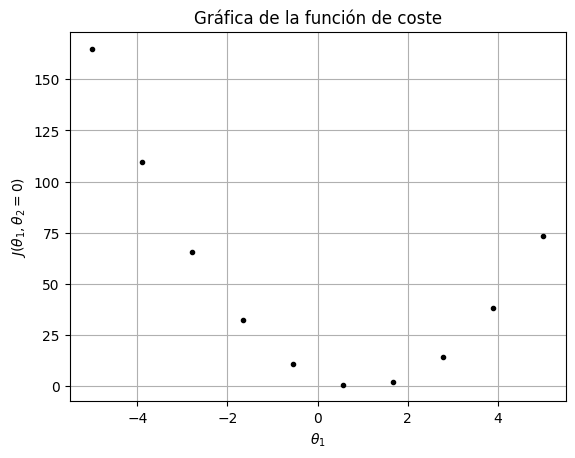

In [5]:
theta0 = 0
x = df['X_1']
y = df['Y']
plt.figure()
theta1 = np.linspace(-5,5,10)
for theta in theta1:
    plt.plot(theta,(cost_function(x,y,theta, theta0)),'.-', color='black')
plt.title('Gráfica de la función de coste')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$J(\theta_1, \theta_2=0)$')
plt.grid()

theta_1: 0.9999


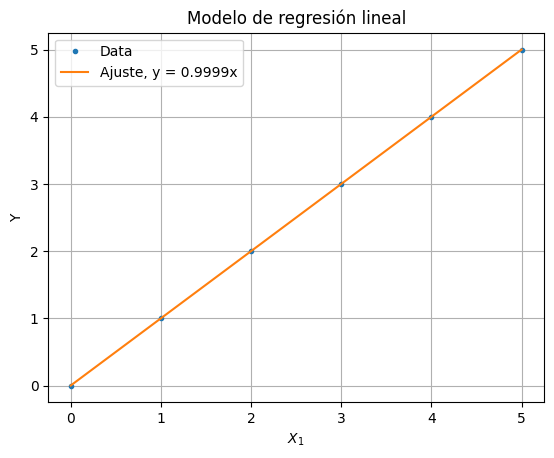

In [6]:

def grad_theta0(x,y, theta1, theta0):
    m = len(x)
    return (1 / m) * np.sum((theta0 + theta1 * x - y))

def grad_theta1(x,y,theta1, theta0):
    m = len(x)
    return (1 / m) * np.sum((theta0 + theta1 * x -y) * x)

def linear_model(x,m,b):
    return m * x + b



# Obteniendo la recta de regresión usando gradiente
w = np.random.randn()
learning_rate = 0.01
epochs = 100

# Gradiente Descendente
for epoch in range(epochs):
    y_pred = w * x
    error = y_pred - y
    gradient = grad_theta1(x,y,w,theta0)
    w -= learning_rate * gradient

print(fr"theta_1: {w:.4f}")

plt.figure()
plt.plot(df['X_1'], df['Y'],'.', label='Data')
plt.plot(df['X_1'], linear_model(df['X_1'],w, theta0),label=f'Ajuste, y = {w:.4}x')
plt.xlabel(r'$X_1$')
plt.ylabel(f'Y')
plt.title('Modelo de regresión lineal')
plt.grid()
plt.legend()


4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.








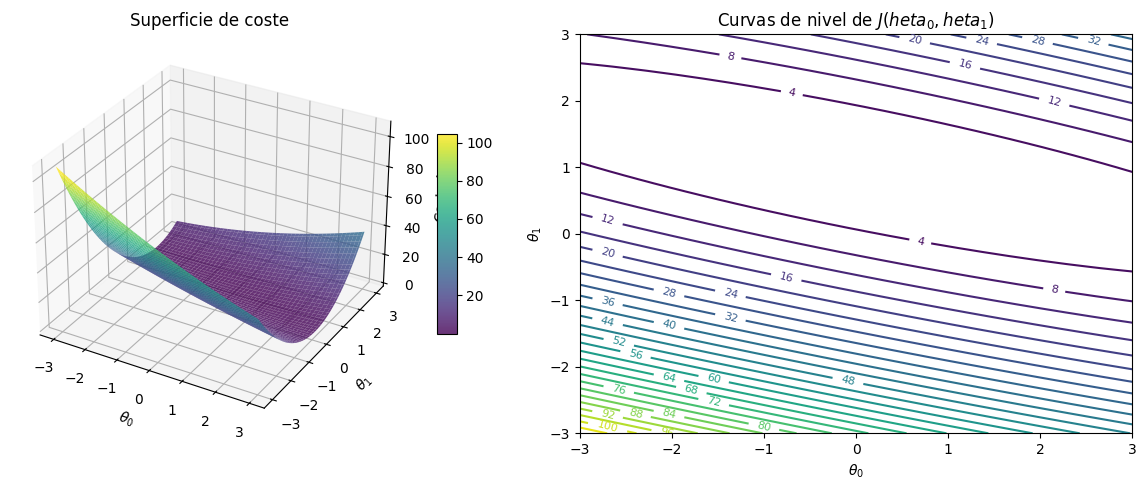

In [9]:
# Función de coste en dos variables:
theta0_vals = np.linspace(-3.0, 3.0, 100)
theta1_vals = np.linspace(-3.0, 3.0, 100)
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

cost_vec = np.vectorize(lambda t0, t1: cost_function(x, y, t1, t0))
J = cost_vec(T0, T1)

# --- 5) Superficie 3D ---
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(T0, T1, J, cmap='viridis', edgecolor='none', alpha=0.8)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel('Coste $J$')
ax.set_title('Superficie de coste')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# --- 6) Curvas de nivel ---
ax2 = fig.add_subplot(122)
cont = ax2.contour(T0, T1, J, levels=30, cmap='viridis')
ax2.clabel(cont, inline=True, fontsize=8)
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_title('Curvas de nivel de $J(\theta_0,\theta_1)$')

plt.tight_layout()
plt.show()

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

- Caso 1D:

Sean $x_i$ y $y_i$, con $i = 1,2,3,...,m$. El modelo de regresión es $$\hat{y}_i = \omega x_i$$. La función de coste es: 

$$J(\omega) = \frac{1}{2m} \sum_{i=1}^m (\omega x_i -y_i)^2$$
Y su gradiente: 
$$J'(\omega) =\frac{dJ}{d\omega} = \frac{1}{m} \sum_{i=1}^m (\omega x_i -y_i)x_i$$

- Caso 2D: 

El modelo de regresión es $$\hat{y}_i =\theta_0+ \theta_1 x_i$$. La función de coste es: 

$$J(\theta0,\theta1) = \frac{1}{2m} \sum_{i=1}^m (\theta0+\theta1 x_i -y_i)^2$$
Y su gradiente (Derivadas parciales):
\begin{align*}
 \frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m (\theta_0 +\theta_1 x_i -y_i) \\
 \frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^m (\theta_0 +\theta_1 x_i -y_i)x_i
\end{align*}


6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$.

In [21]:
def grad_x(x):
    return 2*(x-4)

epsilon = 1e-4
alpha = 0.1
x = 0.0
def calculo(x, alpha):
    """ Función para calcular el mínimo """
    iteracion = 0
    while True and iteracion<=200:
        grad = grad_x(x)
        x_new = x-alpha * grad
        iteracion += 1
        if abs(x_new - x) <epsilon:
            x = x_new
            break

        x = x_new

    print(f"ha convergido para {iteracion} iteraciones")
    print(f"x aproximado es: {x:5f}")

alpha_values = np.linspace(0.2, 0.4, 3)
print('-'*20)
for i in alpha_values:
    print(f'Para {i}')
    calculo(x,i)
    print('-'*20)

--------------------
Para 0.2
ha convergido para 20 iteraciones
x aproximado es: 3.999854
--------------------
Para 0.30000000000000004
ha convergido para 13 iteraciones
x aproximado es: 3.999973
--------------------
Para 0.4
ha convergido para 8 iteraciones
x aproximado es: 3.999990
--------------------


7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.



In [23]:
from sympy import symbols, cos, diff, sin, exp, lambdify

In [27]:
import numpy as np

# 1) Definición vectorizada del gradiente de F(x,y)
def gradF(W):
    """
    W: array de forma (..., 2), donde
       - W[..., 0] = x
       - W[..., 1] = y
    Devuelve un array de mismo shape (..., 2) con [∂F/∂x, ∂F/∂y].
    """
    # Extraemos x e y de la última dimensión
    X = W[..., 0]  # todos los puntos, componente x
    Y = W[..., 1]  # todos los puntos, componente y
    
    # Definimos subexpresiones A y B para simplificar el gradiente
    A = 0.5 * X**2 - 0.25 * Y**2 + 3     # argumento de sin(A)
    B = 2 * X + 1 - np.exp(Y)            # argumento de cos(B)
    
    # Derivada parcial ∂F/∂x, usando regla de la cadena:
    # d/dx [sin(A)*cos(B)] =
    #   cos(A)*A' * cos(B) - sin(A)*(-sin(B)*B')
    dfdx = np.cos(A) * (X) * np.cos(B) - np.sin(A) * (2) * np.sin(B)
    
    # Derivada parcial ∂F/∂y:
    # d/dy [sin(A)*cos(B)] =
    #   cos(A)*A' * cos(B) - sin(A)*(-sin(B)*B')
    # donde A' = dA/dy = -0.5*Y, B' = dB/dy = -exp(Y)
    dfdy = (np.cos(A) * (-0.5 * Y) * np.cos(B) +
            np.sin(A) * (-np.exp(Y)) * np.sin(B))
    
    # Reconstruimos el array de gradientes con la misma estructura que W
    return np.stack((dfdx, dfdy), axis=-1)


# 2) Descenso de gradiente en batch (varios puntos en paralelo)
def gradient_descent_batch(grad_func, alphas, initial_points,
                           epsilon=1e-4, max_iter=10000):
    """
    grad_func: función vectorizada que toma W shape (batch,2) → gradientes (batch,2)
    alphas: lista/array shape (batch,) de tasas de aprendizaje distintas
    initial_points: array shape (batch,2) con los puntos iniciales
    epsilon: umbral para la norma del gradiente (criterio de parada)
    max_iter: número máximo de iteraciones
    """
    # Configuramos W con los puntos iniciales y alphas para broadcasting
    W = np.array(initial_points, dtype=float)      # (batch, 2)
    alphas = np.array(alphas, dtype=float)[:, None]  # (batch, 1)
    
    for _ in range(max_iter):
        grads = grad_func(W)                       # gradientes (batch, 2)
        # Calculamos norma de cada gradiente (para cada punto)
        norms = np.linalg.norm(grads, axis=1, keepdims=True)  # (batch,1)
        # Si todas las normas son menores que epsilon, detenemos
        if np.all(norms < epsilon):
            break
        # Actualizamos todos los puntos en paralelo
        W = W - alphas * grads
    
    return W  # puntos aproximados de mínimo (batch,2)


# 3) Ejemplo de uso: mismo punto inicial con tres alphas distintos
initial = np.array([[1, -4]] * 3)  # 3 puntos iniciales idénticos (batch=3)
alphas = [0.01, 0.1, 0.5]          # 3 tasas de aprendizaje

# Ejecutamos el descenso en batch
minima = gradient_descent_batch(gradF, alphas, initial)

# Mostramos los resultados para cada alpha
for a, m in zip(alphas, minima):
    print(f"alpha = {a:.2f} → mínimo aproximado en (x, y) ≈ {m}")


alpha = 0.01 → mínimo aproximado en (x, y) ≈ [ 1.09965368 -2.85224318]
alpha = 0.10 → mínimo aproximado en (x, y) ≈ [ 1.09965368 -2.85224318]
alpha = 0.50 → mínimo aproximado en (x, y) ≈ [ 0.63493067 -3.03306291]


8. Empleando los siguientes datos :

```
X = np.linspace(0, 1, 100)
y = 0.2 + 0.2*X + 0.02*np.random.random(100)
```

y las herramientas desarrolladas en los apartados anteriores,
construya un algorítmo que permita determinar una regresión lineal.

,y,X
0,0.207984,0.000000
1,0.212793,0.010101
2,0.219420,0.020202
3,0.216918,0.030303
4,0.226966,0.040404
...,...,...
95,0.409684,0.959596
96,0.408072,0.969697
97,0.408369,0.979798
98,0.401907,0.989899


In [39]:
import numpy as np
import pandas as pd
from IPython.display import display


# 1) Generación de los datos

X = np.linspace(0, 1, 100)
y = 0.2 + 0.2 * X + 0.02 * np.random.random(100)

df1 = pd.DataFrame({
    'X': X,
    'y': y
})
print("Primeras filas de los datos:")
display(df1.head())



# 2) Definición de la malla de búsqueda de parámetros

theta0_vals = np.linspace(0, 1, 1000)
theta1_vals = np.linspace(0, 1, 1000)

# Construimos los grids 2D de θ0 y θ1
t0_grid, t1_grid = np.meshgrid(theta0_vals, theta1_vals)



# 3) Función de coste

def coste1(theta0, theta1, data):
    """
    Calcula J(θ0,θ1) = (1/2m) Σ_i (θ0 + θ1·X_i - y_i)^2
    para cada par (θ0,θ1) en las mallas theta0, theta1.
    
    Parámetros:
      theta0, theta1 : arrays 2D de idéntica forma
      data           : DataFrame con columnas 'X' y 'y'
    Retorna:
      J : array 2D con el coste evaluado en cada (θ0,θ1)
    """
    m = len(data)
    J = np.zeros_like(theta0)
    # Recorremos cada muestra para acumular el coste
    for i in range(m):
        Xi = data['X'].iloc[i]
        yi = data['y'].iloc[i]
        # Nota: la división por 2m la puedes sacar fuera del bucle si prefieres
        J += (1/(2*m)) * (theta0 + theta1 * Xi - yi)**2
    return J



# 4) Evaluación de la función de coste en toda la malla

fcoste1 = coste1(t0_grid, t1_grid, df1)



# 5) Búsqueda de los parámetros que minimizan el coste

# Indice del mínimo
min_idx = np.unravel_index(np.argmin(fcoste1), fcoste1.shape)

# Parámetros óptimos
theta0_min = t0_grid[min_idx]
theta1_min = t1_grid[min_idx]
J_min      = fcoste1[min_idx]


# 6) Resultados

print(f"Mínimo valor de la función de coste: {J_min:.8f}")
print(f"Valores óptimos: θ0 = {theta0_min:.4f}, θ1 = {theta1_min:.4f}")


Primeras filas de los datos:


,X,y
0,0.000000,0.213963
1,0.010101,0.212742
2,0.020202,0.210231
3,0.030303,0.222337
4,0.040404,0.221775


Mínimo valor de la función de coste: 0.00001615
Valores óptimos: θ0 = 0.2132, θ1 = 0.1942


9. Compare su resultado empleando la libreria linearRegresion() de sklearn.

In [40]:
from sklearn.linear_model import LinearRegression


# Remodelamos X para sklearn (shape (n_samples, 1))
X_reshaped = df1['X'].values.reshape(-1, 1)
y_vals     = df1['y'].values

# Creamos y entrenamos el modelo
model = LinearRegression(fit_intercept=True)
model.fit(X_reshaped, y_vals)

# Extraemos los parámetros
theta0_skl = model.intercept_
theta1_skl = model.coef_[0]

# Calculamos el coste para esos parámetros
m = len(y_vals)
J_skl = (1/(2*m)) * ((theta0_skl + theta1_skl*df1['X'] - df1['y'])**2).sum()

print("\n--- Comparación con sklearn ---")
print(f"sklearn θ0 = {theta0_skl:.4f}, θ1 = {theta1_skl:.4f}")
print(f"Coste con sklearn: J = {J_skl:.8f}")

# Ya tienes:
#   Grid search → θ₀ = {theta0_min:.4f}, θ₁ = {theta1_min:.4f}, J = {J_min:.8f}
#   sklearn     → θ₀ = {theta0_skl:.4f}, θ₁ = {theta1_skl:.4f}, J = {J_skl:.8f}



--- Comparación con sklearn ---
sklearn θ0 = 0.2133, θ1 = 0.1944
Coste con sklearn: J = 0.00001613


Se puede observar que este método que estoy implementando mejora los resultados de sklearn